# Clustering Crypto

In [34]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Deliverable 1: Preprocessing the Data for PCA

In [35]:
# Load the crypto_data.csv dataset.
# https://note.nkmk.me/en/python-pandas-set-index/
# https://stackoverflow.com/questions/29862864/different-read-csv-index-col-none-0-false-in-pandas
file_path = Path("Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [36]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 42 to PUNK
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1252 non-null   object 
 1   Algorithm        1252 non-null   object 
 2   IsTrading        1252 non-null   bool   
 3   ProofType        1252 non-null   object 
 4   TotalCoinsMined  744 non-null    float64
 5   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 59.9+ KB


In [37]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df.loc[crypto_df["IsTrading"] == True,:]
print(crypto_df.shape)
crypto_df.head(10)

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [38]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df = crypto_df.dropna(subset=["Algorithm"])
print(crypto_df.shape)
crypto_df.head(10)

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [39]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(columns="IsTrading")
print(crypto_df.shape)
crypto_df.head(10)

(1144, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [40]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
print(crypto_df.shape)
crypto_df.head(10)

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [41]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
print(crypto_df.shape)
crypto_df.head(10)

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [42]:
# Create a new DataFrame that holds only the cryptocurrencies names.
names_df = crypto_df[["CoinName"]]
print(names_df.shape)
names_df.head(5)

(532, 1)


,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [43]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(columns="CoinName")
print(crypto_df.shape)
crypto_df.head(10)

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [44]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [45]:
# Convert  from object to numeric
crypto_df["TotalCoinSupply"] = pd.to_numeric(crypto_df["TotalCoinSupply"])
crypto_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [46]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=["Algorithm","ProofType"])
# X = pd.get_dummies(crypto_df)
print(X.shape)
X.head(10)

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,8.400000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,2.200000e+07,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,2.100000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    float64
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorithm_Cr

In [48]:
# Saving cleaned data
file_path = Path("Resources/X.csv")
X.to_csv(file_path, index=False)

In [49]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [50]:
# Using PCA to reduce dimension to three principal components.
# Initialize PCA model
pca = PCA(n_components=3).fit_transform(X_scaled)
pca

array([[-0.33229424,  0.97831529, -0.57015029],
       [-0.31563664,  0.97807964, -0.57066077],
       [ 2.29863025,  1.57254859, -0.6934603 ],
       ...,
       [ 0.32546322, -2.33779741,  0.36669305],
       [-0.17201058, -1.90546155,  0.46190436],
       [-0.28269826,  0.8204454 , -0.26695568]])

In [51]:
# Transform PCA to a DataFrame with the three principal components.

pca_df = pd.DataFrame(data=pca, 
                      columns=["PC 1","PC 2","PC 3"], index=X.index)
print(pca_df.shape)
pca_df.head(10)

(532, 3)


,PC 1,PC 2,PC 3
42,-0.332294,0.978315,-0.570150
404,-0.315637,0.978080,-0.570661
1337,2.298630,1.572549,-0.693460
BTC,-0.142672,-1.298813,0.178266
ETH,-0.164704,-2.007272,0.394146
LTC,-0.160700,-1.146696,-0.007100
DASH,-0.402621,1.216184,-0.528372
XMR,-0.142442,-2.167524,0.417265
ETC,-0.163146,-2.007413,0.394115
ZEC,-0.172010,-1.905462,0.461904


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\kayse\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



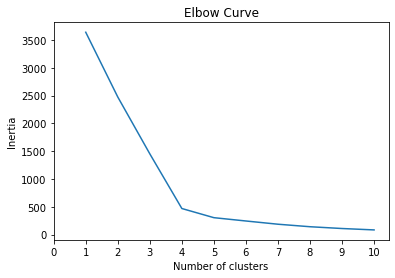

In [52]:
# Create an elbow curve to find the best value for K.
# Create an empty list to hold inertia values
inertia = []

# Store Values of K to Plot
k = list(range(1, 11))

#Loop through K values and find inertia
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)
    
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Running K-Means with `k=4`

In [53]:
# Initialize the K-Means model.
# YOUR CODE HERE
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)
predictions

array([0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0,

In [54]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pca_df], axis=1).reindex(crypto_df.index)
clustered_df.head(5)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,-0.332294,0.978315,-0.570150
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,-0.315637,0.978080,-0.570661
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11,2.298630,1.572549,-0.693460
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07,-0.142672,-1.298813,0.178266
ETH,Ethash,PoW,1.076842e+08,0.000000e+00,-0.164704,-2.007272,0.394146


In [55]:
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = pd.concat([clustered_df, names_df], axis=1).reindex(crypto_df.index)
clustered_df.head(5)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,-0.332294,0.978315,-0.570150,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,-0.315637,0.978080,-0.570661,404Coin
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11,2.298630,1.572549,-0.693460,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07,-0.142672,-1.298813,0.178266,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0.000000e+00,-0.164704,-2.007272,0.394146,Ethereum


In [56]:
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,-0.332294,0.978315,-0.570150,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,-0.315637,0.978080,-0.570661,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11,2.298630,1.572549,-0.693460,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07,-0.142672,-1.298813,0.178266,Bitcoin,2
ETH,Ethash,PoW,1.076842e+08,0.000000e+00,-0.164704,-2.007272,0.394146,Ethereum,2
LTC,Scrypt,PoW,6.303924e+07,8.400000e+07,-0.160700,-1.146696,-0.007100,Litecoin,2
DASH,X11,PoW/PoS,9.031294e+06,2.200000e+07,-0.402621,1.216184,-0.528372,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0.000000e+00,-0.142442,-2.167524,0.417265,Monero,2
ETC,Ethash,PoW,1.133597e+08,2.100000e+08,-0.163146,-2.007413,0.394115,Ethereum Classic,2
ZEC,Equihash,PoW,7.383056e+06,2.100000e+07,-0.172010,-1.905462,0.461904,ZCash,2


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [69]:
# Creating a 3D-Scatter with the PCA data and the clusters
# https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d.html#plotly-express-scatter-3d
# https://plotly.com/python/hover-text-and-formatting/
px.scatter_3d(
    data_frame=clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
#     hover_name=["CoinName"],
#     hover_data=["Algorithm"]
)


In [58]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName',
                                   'Algorithm',
                                   'ProofType',
                                   'TotalCoinSupply',
                                   'TotalCoinsMined',
                                   'Class'])

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [59]:
len(clustered_df.CoinName.unique())

531

In [60]:
# Print the total number of tradable cryptocurrencies.
num_tradable = len(clustered_df["CoinName"])
print(f"There are {num_tradable} tradable cryptocurrencies.")

There are 532 tradable cryptocurrencies.


In [61]:
clustered_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
PC 1               float64
PC 2               float64
PC 3               float64
CoinName            object
Class                int32
dtype: object

In [62]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
coin_count_cols_df = clustered_df[["TotalCoinSupply", "TotalCoinsMined"]].copy()

print(coin_count_cols_df.shape)
coin_count_cols_df.head(10)

(532, 2)


,TotalCoinSupply,TotalCoinsMined
42,4.200000e+01,4.199995e+01
404,5.320000e+08,1.055185e+09
1337,3.141593e+11,2.927942e+10
BTC,2.100000e+07,1.792718e+07
ETH,0.000000e+00,1.076842e+08
LTC,8.400000e+07,6.303924e+07
DASH,2.200000e+07,9.031294e+06
XMR,0.000000e+00,1.720114e+07
ETC,2.100000e+08,1.133597e+08
ZEC,2.100000e+07,7.383056e+06


In [63]:
coin_count_cols_scaled = MinMaxScaler().fit_transform(coin_count_cols_df)
print(coin_count_cols_scaled[0:5])

[[4.20000000e-11 0.00000000e+00]
 [5.32000000e-04 1.06585544e-03]
 [3.14159265e-01 2.95755135e-02]
 [2.10000000e-05 1.81084216e-05]
 [0.00000000e+00 1.08773140e-04]]


In [ ]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE

plot_df.head(10)

In [64]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
df_scaled = pd.DataFrame(data=coin_count_cols_scaled, 
                      columns=["TotalCoinSupply","TotalCoinsMined"], index=clustered_df.index)
print(df_scaled.shape)
df_scaled.head(10)

(532, 2)


,TotalCoinSupply,TotalCoinsMined
42,4.200000e-11,0.000000
404,5.320000e-04,0.001066
1337,3.141593e-01,0.029576
BTC,2.100000e-05,0.000018
ETH,0.000000e+00,0.000109
LTC,8.400000e-05,0.000064
DASH,2.200000e-05,0.000009
XMR,0.000000e+00,0.000017
ETC,2.100000e-04,0.000115
ZEC,2.100000e-05,0.000007


In [65]:
# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# Make Data Frame from clustered_df with "CoinName" and "Class" columns only.
df1 = clustered_df[["CoinName", "Class"]].copy()
df1.head(10)

,CoinName,Class
42,42 Coin,0
404,404Coin,0
1337,EliteCoin,0
BTC,Bitcoin,2
ETH,Ethereum,2
LTC,Litecoin,2
DASH,Dash,0
XMR,Monero,2
ETC,Ethereum Classic,2
ZEC,ZCash,2


In [66]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
plot_df = pd.concat([df_scaled, df1], axis=1).reindex(df1.index)

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,2
ETH,0.000000e+00,0.000109,Ethereum,2
LTC,8.400000e-05,0.000064,Litecoin,2
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,2
ETC,2.100000e-04,0.000115,Ethereum Classic,2
ZEC,2.100000e-05,0.000007,ZCash,2


In [70]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    hover_cols=["CoinName"],
    by="Class"
)


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)